<a href="https://colab.research.google.com/github/castudil/Machine-Learning/blob/main/S04-KNN/Iris-KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                  names = ["sepal length","sepal width","petal length","petal width","class"])

#from sklearn.datasets import load_iris

In [ ]:
iris.head(5)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


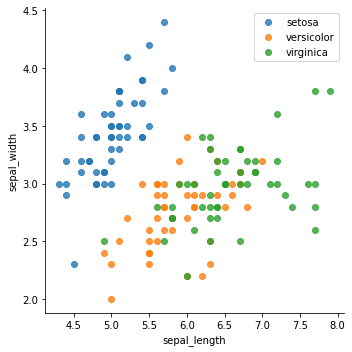

In [ ]:
pltiris = sns.load_dataset("iris")
pltiris["sepal_length"] = pltiris["sepal_length"]
pltiris["sepal_width"] = pltiris["sepal_width"]

sns.lmplot(x="sepal_length", y="sepal_width", data=pltiris, hue="species", fit_reg=False, legend=False)

plt.legend()
plt.show()

Extraer las instancias y cuales extraemos, por un lado los datos y por otro la etiquetas


In [ ]:
X= iris.iloc[:, :-1]
#X= iris.iloc[:, 0:4]
y= iris.iloc[:, -1]
#y= iris.iloc[:, 4]

In [ ]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

Se dividen los datos de entrenamiento de los datos de test, donde **X** representa los datos y **Y** representas las etiquetas. Consideranto un 30% de datos de test [*test_size=0.3*], de forma al azar [*random_state=0"].

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

Visualizar la cantidad de datos de cada conjunto

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

105
105
45
45


Normalizacion de datos: Escalado de características

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# **PREDICCIÓN**

Definir el modelo: Init K-NN. Establecer los parámetros del modelo de clasificación


In [ ]:
clasificador = KNeighborsClassifier(n_neighbors=11, p=2,metric='euclidean')

In [ ]:
clasificador.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

Predecir los resultados del conjunto de pruebas [***test***]

In [ ]:
y_pred = clasificador.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

Evaluar modelo. **Matriz de confusión**

In [ ]:
from sklearn.metrics import f1_score
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


Visualizar matriz

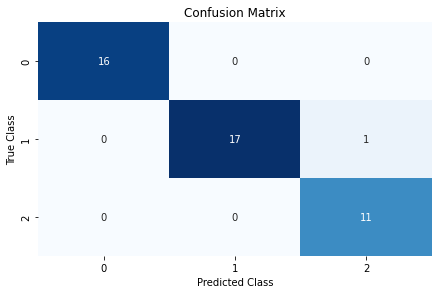

In [ ]:
sns.heatmap(cm, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

Metrica de rendimiento: Puntaje de exactitud


In [ ]:
print(accuracy_score(y_test, y_pred))

0.9777777777777777
